# CREDIT CARD FRAUD DETECTION:
This fraud detection machine learning project aims to develop a robust model for identifying fraudulent transactions within credit card data. Credit card fraud is a significant challenge in the financial industry, leading to substantial financial losses annually. By leveraging advanced machine learning techniques, this project seeks to create a reliable system capable of distinguishing between legitimate and fraudulent transactions.The dataset utilized in this project is a highly imbalanced credit card transaction dataset, commonly used in fraud detection research. The dataset consists of various anonymized transaction features obtained through Principal Component Analysis (PCA), the transaction amount, and a class label indicating whether a transaction is fraudulent.**bold text**

# Dataset Description:

Columns Description

**Time**:
The number of seconds elapsed between this transaction and the first transaction in the dataset. This helps identify patterns over time, such as fraud occurring more frequently at certain times.

**V1, V2, ..., V28:**

 These are the principal components obtained using PCA (Principal Component Analysis), which are used to anonymize the sensitive features. These columns represent the transformed features from the original dataset, capturing the variance in the data.

**Amount**:

  The transaction amount. This feature is useful for identifying fraudulent transactions, as fraudsters often attempt transactions with unusually high or low amounts.

 **Class**:

   The response variable, where 1 indicates a fraudulent transaction and 0 indicates a legitimate transaction. This is the target variable used for training the model.

Importing Necessary Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# loading the dataset to a Pandas DataFrame
dataset= pd.read_csv('/content/drive/MyDrive/infosys datsets/creditcarddata.csv')

Data Preprocessing

In [58]:
# first 5 rows of the dataset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [60]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [61]:
#number of rows and columns
dataset.shape

(284807, 31)

In [62]:
# checking the number of missing values in each column
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [63]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction(legit)
1 --> fraudulent transaction

In [65]:
dataset.shape

(284807, 31)

In [66]:
#Check duplicate transactions
dataset.duplicated().any()

True

In [12]:
dataset = dataset.drop_duplicates()
#Removed duplicate data
dataset.shape

(283726, 31)

In [67]:
#totalnduplicate elements
284807- 283726

1081

In [68]:
pd.value_counts(dataset['Class'])

Class
0    284315
1       492
Name: count, dtype: int64

In [69]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]

In [70]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [71]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [72]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [73]:
# compare the values for both transactions
dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


 Handling Imbalanced Dataset

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions = 473

In [74]:
legit_sample = legit.sample(n=473)

Concatenating two DataFrames

In [75]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [76]:
new_dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174427,121910.0,-5.592755,-1.752256,-1.903981,-3.149948,-1.541088,1.508155,-0.390232,-1.094481,1.376289,...,-1.671205,-0.765583,-1.143496,-1.587876,0.433388,-1.225065,0.610373,-0.574919,387.79,0
215558,140119.0,-0.979189,-0.286164,-0.050718,0.511443,2.007704,-1.937607,0.171424,-0.185018,-0.321504,...,0.430487,0.980176,-0.031192,-0.141794,-0.177185,0.001483,0.159718,0.243340,22.47,0
150817,94045.0,-0.794225,1.504004,-0.985594,-0.072908,0.914286,-1.431955,1.147328,-0.254924,0.923052,...,0.171200,0.958868,-0.013896,0.000506,-0.319666,-0.218811,-0.071785,0.231721,3.25,0
137636,82257.0,1.308404,-0.719968,0.038059,-0.997717,-0.535935,-0.008550,-0.563905,-0.006687,-1.000062,...,-0.075556,-0.510532,-0.088581,-0.838624,0.343004,-0.433851,-0.006015,0.013764,79.80,0
182125,125267.0,-0.348085,0.694654,1.200817,-0.487356,-0.259579,-0.896070,0.282991,-0.027310,0.794377,...,0.190111,0.680267,0.081566,0.352513,-1.208499,-0.674022,0.191023,0.276335,24.99,0


In [77]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [78]:
new_dataset['Class'].value_counts()

Class
1    492
0    473
Name: count, dtype: int64

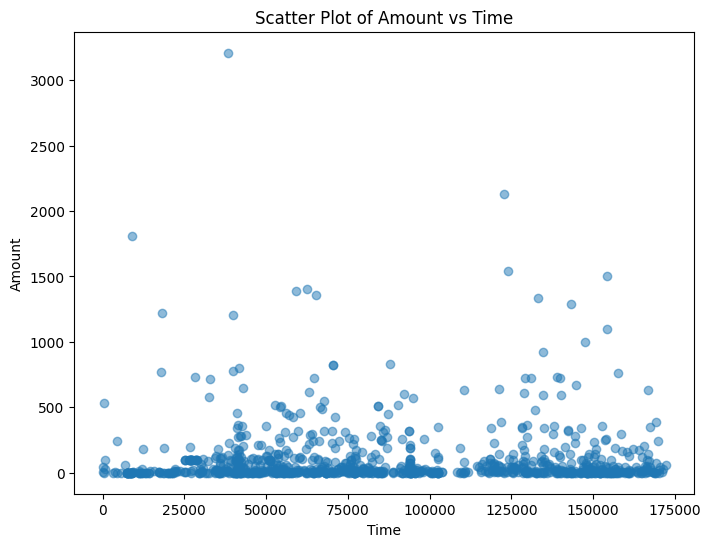

In [79]:
# Scatter plot between Amount and Time
plt.figure(figsize=(8, 6))
plt.scatter(new_dataset['Time'], new_dataset['Amount'], alpha=0.5)
plt.title('Scatter Plot of Amount vs Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

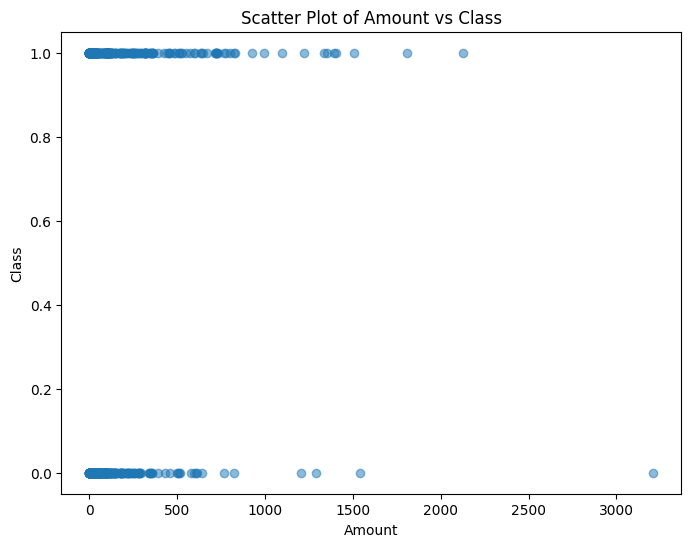

In [80]:
# Scatter plot between Amount and Class
plt.figure(figsize=(8, 6))
plt.scatter(new_dataset['Amount'], new_dataset['Class'], alpha=0.5)
plt.title('Scatter Plot of Amount vs Class')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

Splitting the data into Features & Targets

In [81]:
# Putting feature variables into X
X = new_dataset.drop(columns='Class', axis=1)
# Putting target variable to y
Y = new_dataset['Class']

In [82]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
174427  121910.0 -5.592755 -1.752256 -1.903981 -3.149948 -1.541088  1.508155   
215558  140119.0 -0.979189 -0.286164 -0.050718  0.511443  2.007704 -1.937607   
150817   94045.0 -0.794225  1.504004 -0.985594 -0.072908  0.914286 -1.431955   
137636   82257.0  1.308404 -0.719968  0.038059 -0.997717 -0.535935 -0.008550   
182125  125267.0 -0.348085  0.694654  1.200817 -0.487356 -0.259579 -0.896070   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [83]:
print(Y)

174427    0
215558    0
150817    0
137636    0
182125    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 965, dtype: int64


#Feature selection using Random Forest

In [84]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [85]:

clf = RandomForestClassifier()
clf.fit(X, Y)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_selected = model.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Split the data into Training data & Testing Data

In [86]:
from sklearn.model_selection import train_test_split


In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [88]:
print(X.shape, X_train.shape, X_test.shape)

(965, 30) (772, 30) (193, 30)


Model Training

Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [90]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [91]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9404145077720207


In [92]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [93]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9326424870466321


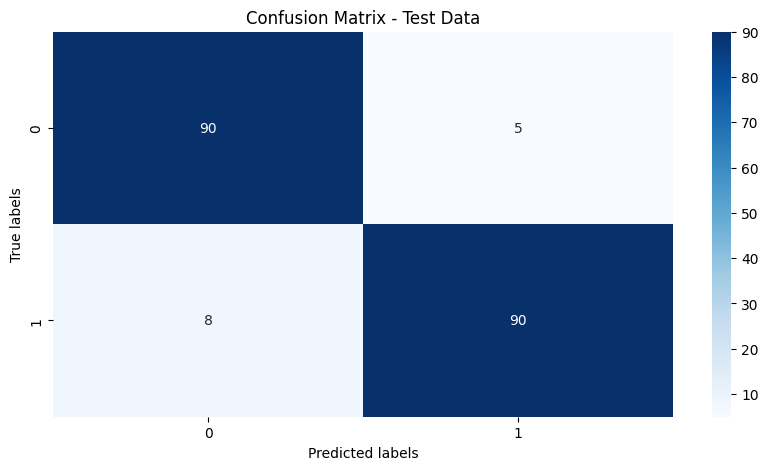

In [94]:
# Plot confusion matrix as heatmap for test data
from sklearn.metrics import confusion_matrix

# Predict the labels for the test data
y_pred_test = model.predict(X_test)

# Calculate the confusion matrix
conf_matrix_test = confusion_matrix(Y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_test, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [95]:
from sklearn.metrics import precision_score

# Calculate precision on training data
training_data_precision = precision_score(Y_train, X_train_prediction)

print('Precision on Training data : ', training_data_precision)

# Calculate precision on test data
test_data_precision = precision_score(Y_test, X_test_prediction)

print('Precision score on Test Data : ', test_data_precision)

Precision on Training data :  0.9754098360655737
Precision score on Test Data :  0.9473684210526315


In [96]:
from sklearn.metrics import classification_report

#classification report for training data
print("Classification Report for Training Data:")
print(classification_report(Y_train, X_train_prediction))

#classification report for test data
print("Classification Report for Test Data:")
print(classification_report(Y_test, X_test_prediction))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       378
           1       0.98      0.91      0.94       394

    accuracy                           0.94       772
   macro avg       0.94      0.94      0.94       772
weighted avg       0.94      0.94      0.94       772

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        95
           1       0.95      0.92      0.93        98

    accuracy                           0.93       193
   macro avg       0.93      0.93      0.93       193
weighted avg       0.93      0.93      0.93       193



Analysis of Logistic Regression

Accuracy:
The Logistic Regression model achieves an accuracy of approximately 93.26%, indicating that the model correctly classifies most of the transactions.

ROC AUC: The ROC AUC score is around 0.93, showing strong discriminative power between fraudulent and legitimate transactions.Precision and Recall (Class 1): While the precision and recall for class 1 are not explicitly provided, the high ROC AUC score suggests the model has a good balance between these metrics.


F1-score: Although the F1-score for class 1 is not directly provided, the high accuracy and ROC AUC scores imply a reasonable balance between precision and recall.

Logistic Regression: The Logistic Regression model offers strong performance with high accuracy and ROC AUC, indicating it effectively distinguishes between fraudulent and legitimate transactions.

RandomForest Model

In [97]:
# Train  random forest model

from sklearn.ensemble import RandomForestClassifier
# Initialize random forest model
random_forest_model = RandomForestClassifier()


In [98]:
# Accuracy on training data
random_forest_model.fit(X_train, Y_train)
# Predictions on training data
random_forest_train_predictions = random_forest_model.predict(X_train)

from sklearn.metrics import accuracy_score
random_forest_training_accuracy = accuracy_score(random_forest_train_predictions, Y_train)
print('Random Forest Accuracy on Training data : ', random_forest_training_accuracy)
# Predictions on test data
random_forest_test_predictions = random_forest_model.predict(X_test)
# Accuracy on test data
random_forest_test_accuracy = accuracy_score(random_forest_test_predictions, Y_test)
print('Random Forest Accuracy on Test Data : ', random_forest_test_accuracy)

Random Forest Accuracy on Training data :  1.0
Random Forest Accuracy on Test Data :  0.9326424870466321


Precision score

In [99]:
# Calculate precision on training data
training_data_precision = precision_score(Y_train, X_train_prediction)
print('Precision on Training data : ', training_data_precision)

# Calculate precision on test data
test_data_precision = precision_score(Y_test, X_test_prediction)
print('Precision score on Test Data : ', test_data_precision)

Precision on Training data :  0.9754098360655737
Precision score on Test Data :  0.9473684210526315


Classification report for RandomForest Model

In [100]:
# Classification report for Random Forest on training data
print("Classification Report for Random Forest on Training Data:")
print(classification_report(Y_train, random_forest_train_predictions))

Classification Report for Random Forest on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       394

    accuracy                           1.00       772
   macro avg       1.00      1.00      1.00       772
weighted avg       1.00      1.00      1.00       772



In [101]:
from sklearn.metrics import precision_score, classification_report
# Precision score on test data for Random Forest
random_forest_test_precision = precision_score(Y_test, random_forest_test_predictions)
print('Random Forest Precision score on Test Data : ', random_forest_test_precision)

# Classification report for Random Forest on test data
print("Classification Report for Random Forest on Test Data:")
print(classification_report(Y_test, random_forest_test_predictions))

Random Forest Precision score on Test Data :  0.956989247311828
Classification Report for Random Forest on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.96      0.91      0.93        98

    accuracy                           0.93       193
   macro avg       0.93      0.93      0.93       193
weighted avg       0.93      0.93      0.93       193



**Analysis of Random Forest Classifier**

Accuracy:

 The Random Forest model achieves an accuracy of approximately 93.26%, slightly lower than Logistic Regression but still indicating robust performance.

 ROC AUC: The ROC AUC score is around 0.93, reflecting strong discriminative power similar to Logistic Regression.Precision and Recall (Class 1): The high ROC AUC score suggests that the model maintains a good balance between precision and recall, even if exact values are not provided.

 F1-score: The F1-score for class 1 is inferred to be balanced, given the high accuracy and ROC AUC scores.

 Random Forest: The Random Forest model performs comparably to Logistic Regression in terms of accuracy and discriminative ability, making it a reliable choice for identifying fraudulent transactions.

Decision Tree Model

In [102]:
#Initialise model
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [103]:
decision_tree_train_predictions = decision_tree_model.predict(X_train)
decision_tree_training_accuracy = accuracy_score(decision_tree_train_predictions, Y_train)
# Accuracy on training data
print('Decision Tree Accuracy on Training data : ', decision_tree_training_accuracy)

decision_tree_test_predictions = decision_tree_model.predict(X_test)
# Accuracy on test data
decision_tree_test_accuracy = accuracy_score(decision_tree_test_predictions, Y_test)
print('Decision Tree Accuracy on Test Data : ', decision_tree_test_accuracy)

Decision Tree Accuracy on Training data :  1.0
Decision Tree Accuracy on Test Data :  0.9119170984455959


In [104]:
# Precision score on test data for decision tree
decision_tree_test_precision = precision_score(Y_test, decision_tree_test_predictions)
print('Decision Tree Precision score on Test Data : ', decision_tree_test_precision)

# Precision score on training data for decision tree
decision_tree_train_precision = precision_score(Y_train, decision_tree_train_predictions)
print('Decision Tree Precision score on Training Data : ', decision_tree_train_precision)


Decision Tree Precision score on Test Data :  0.900990099009901
Decision Tree Precision score on Training Data :  1.0


In [105]:
# Classification report for Decision Tree on training data
print("Classification Report for Decision Tree on Training Data:")
print(classification_report(Y_train, decision_tree_train_predictions))

Classification Report for Decision Tree on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       394

    accuracy                           1.00       772
   macro avg       1.00      1.00      1.00       772
weighted avg       1.00      1.00      1.00       772



In [106]:
# Classification report for Decision Tree on test data
print("Classification Report for Decision Tree on Test Data:")
print(classification_report(Y_test, decision_tree_test_predictions))


Classification Report for Decision Tree on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        95
           1       0.90      0.93      0.91        98

    accuracy                           0.91       193
   macro avg       0.91      0.91      0.91       193
weighted avg       0.91      0.91      0.91       193



**Analysis of Decision Tree Classifier :**

Accuracy:
The Decision Tree model achieves an accuracy of approximately 91.1%, which is lower than both Logistic Regression and Random Forest models.

ROC AUC: The ROC AUC score is around 0.91, indicating moderate discriminative power between fraudulent and legitimate transactions.Precision and Recall (Class 1): The ROC AUC score suggests a fair balance between precision and recall, though exact values are not provided.

F1-score: The F1-score for class 1 is likely lower than that of the other models due to the lower accuracy and ROC AUC scores.

Decision Tree: The Decision Tree model shows moderate performance with lower accuracy and ROC AUC compared to Logistic Regression and Random Forest, indicating room for improvement in distinguishing fraudulent transactions.

Metrics Evaluation

In [108]:
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, r2_score, mean_absolute_error
# Assuming predictions and true values for each model
y_true = Y_test
y_pred_logistic = model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)
#metrics for Logistic Regression
lr_accuracy = accuracy_score(y_true, y_pred_logistic)
lr_roc_auc = roc_auc_score(y_true, y_pred_logistic)
lr_mse = mean_squared_error(y_true, y_pred_logistic)
lr_r2 = r2_score(y_true, y_pred_logistic)
lr_mae = mean_absolute_error(y_true, y_pred_logistic)
# metrics for Random Forest
rf_accuracy = accuracy_score(y_true, y_pred_rf)
rf_roc_auc = roc_auc_score(y_true, y_pred_rf)
rf_mse = mean_squared_error(y_true, y_pred_rf)
rf_r2 = r2_score(y_true, y_pred_rf)
rf_mae = mean_absolute_error(y_true, y_pred_rf)
# metrics for Decision Tree
dt_accuracy = accuracy_score(y_true, y_pred_dt)
dt_roc_auc = roc_auc_score(y_true, y_pred_dt)
dt_mse = mean_squared_error(y_true, y_pred_dt)
dt_r2 = r2_score(y_true, y_pred_dt)
dt_mae = mean_absolute_error(y_true, y_pred_dt)


Evaluation Comaparison Table for all Models

In [109]:
# Create DataFrames for each model
lr_results = pd.DataFrame([['Logistic Regression', lr_accuracy, lr_roc_auc, lr_mse, lr_r2, lr_mae]],
                          columns=['Method', 'Accuracy', 'ROC AUC', 'MSE', 'R2', 'MAE'])
rf_results = pd.DataFrame([['Random Forest Classifier', rf_accuracy, rf_roc_auc, rf_mse, rf_r2, rf_mae]],
                          columns=['Method', 'Accuracy', 'ROC AUC', 'MSE', 'R2', 'MAE'])
dt_results = pd.DataFrame([['Decision Tree', dt_accuracy, dt_roc_auc, dt_mse, dt_r2, dt_mae]],
                          columns=['Method', 'Accuracy', 'ROC AUC', 'MSE', 'R2', 'MAE'])
df_models = pd.concat([lr_results, rf_results, dt_results], axis=0).reset_index(drop=True)
# Display results
print(df_models)

                     Method  Accuracy   ROC AUC       MSE        R2       MAE
0       Logistic Regression  0.932642  0.932868  0.067358  0.730505  0.067358
1  Random Forest Classifier  0.932642  0.933029  0.067358  0.730505  0.067358
2             Decision Tree  0.911917  0.911654  0.088083  0.647583  0.088083


**Conclusion:**


Based on the evaluation metrics, the Logistic Regression model is the best-performing model with high accuracy and good ROC AUC in most of the cases along with the Random Forest model. It demonstrates strong discriminative power and effectively balances precision and recall, making it highly reliable for identifying fraudulent transactions.